## How to combine multiple independent posterior density distributions
Suppose we run $k$ independent sets (chromosomes) of $n$ simulations with the same model and priors, where each set of simulations produces summary statistics, $s$, from different amounts of data, $\vec{\mathcal{l}}$.
We obtain a posterior distribution of a parameter, $\pi(\theta)$, for each set of simulations.  

To combine the posteriors:  
- weight the densities by the amount of data,
- add the weigted densities across the sets together,
- nomalize so sum over densities equals 1, by deviding the summed, weigted densities by the sum of all the weighted densities

$$
\sum_1^k \mathcal{l}(d_{ij})
$$
where $i$ is the 


In [64]:
import math
import random
from random import shuffle
from random import randint
import numpy as np
import pandas as pd
from ggplot import *
import functools

### 1. create fake posteriors

In [51]:
prior_df = pd.DataFrame()
for chrom in range(3):
    prior = (random.uniform(0.0,1.0) for _ in range(100))
    prior_table = []
    for p in prior:
        prior_table.append(p)
    prior_df['iter'] = prior_df.index
    prior_df['theta_'+str(chrom)] = prior_table
prior_df.head()

,iter,theta_0,theta_1,theta_2
0,0,0.376049,0.281396,0.524795
1,1,0.276092,0.087139,0.765148
2,2,0.113674,0.999641,0.533422
3,3,0.415428,0.052782,0.067426
4,4,0.847067,0.005558,0.066545


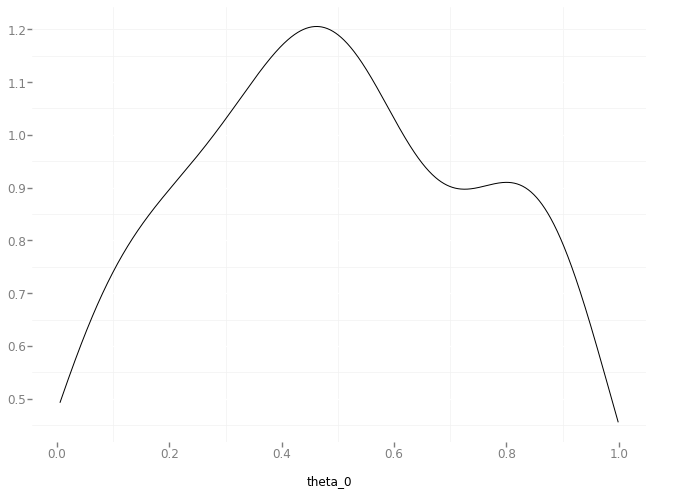

<ggplot: (290385501)>


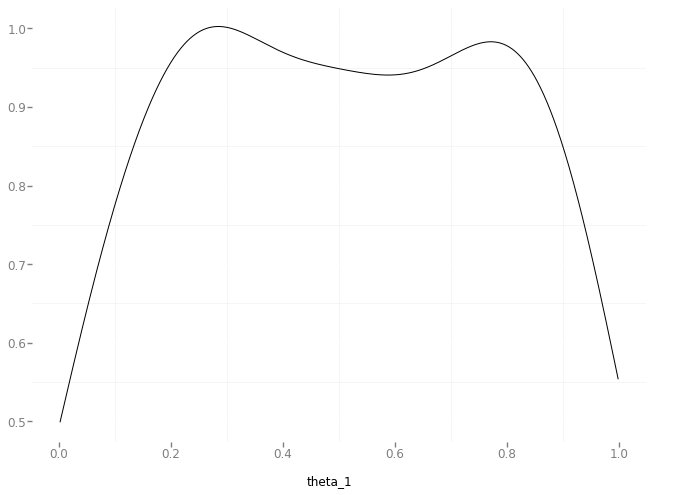

<ggplot: (288546341)>


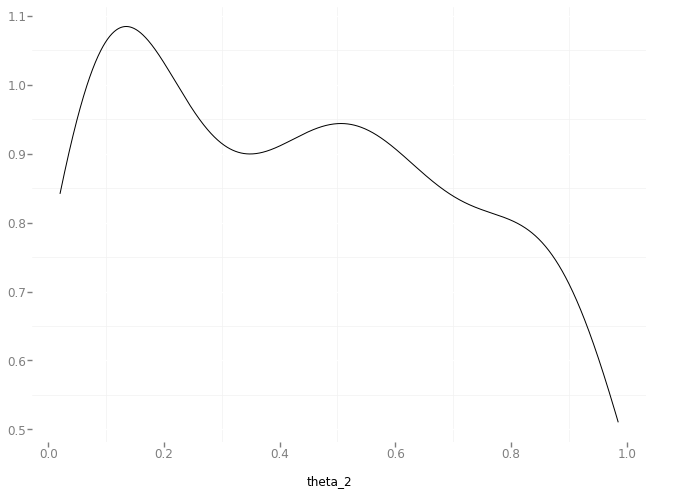

<ggplot: (288563701)>


In [62]:
for chrom in range(3):
    plot = ggplot(aes(x = 'theta_'+str(chrom)), data = prior_df) + \
        geom_density() + \
        theme_bw()
    print(plot)

In [56]:
prior_df_long = pd.wide_to_long(prior_df, ['theta'],i='iter',j='chrom',sep='_')
prior_df_long.tail()

,,theta
iter,chrom,
95,2,0.981637
96,2,0.806640
97,2,0.117365
98,2,0.086736
99,2,0.138602


In [87]:
def create_densities():
    current_max = 0.5
    probabilities = []
    for i in range(9):
        probabilities.append(random.uniform(0,current_max))
        current_max = current_max - probabilities[-1]
    probabilities.append(1-sum(probabilities))
    shuffle(probabilities)
    return probabilities

posterior_df = pd.DataFrame()
for chrom in range(3):
    probabilities = create_densities()
    posterior_df['theta_'+str(chrom)] = probabilities
posterior_df['bin'] = posterior_df.index
posterior_df.head()

,theta_0,theta_1,theta_2,bin
0,0.076506,0.000531,0.000407,0
1,0.500422,0.000097,0.000582,1
2,0.000221,0.000155,0.146918,2
3,0.051687,0.000259,0.000011,3
4,0.034509,0.000042,0.088730,4


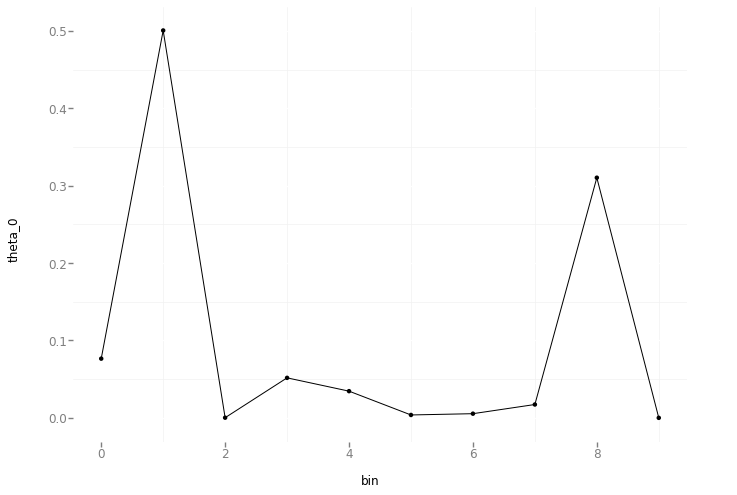

<ggplot: (288574909)>


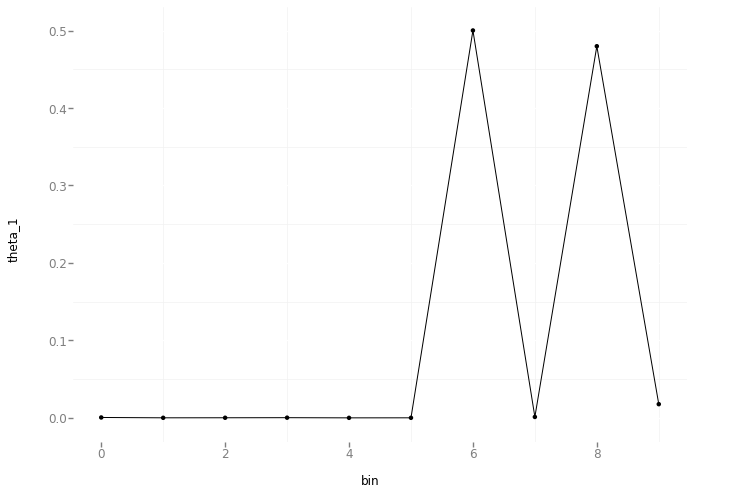

<ggplot: (290528453)>


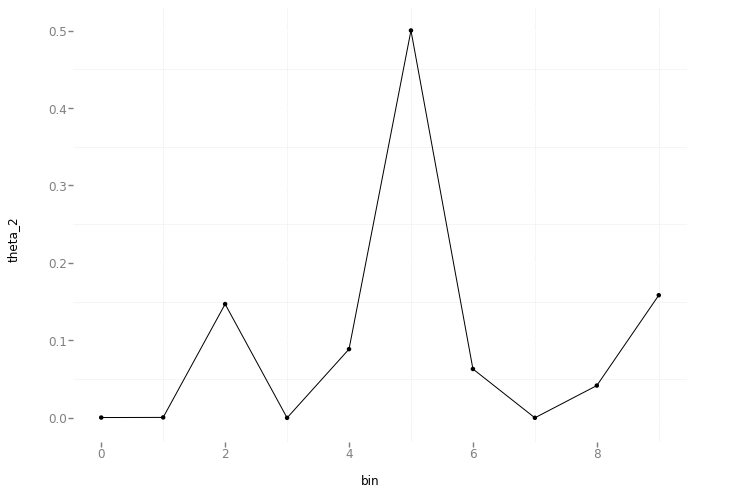

<ggplot: (290125473)>


In [88]:
for chrom in range(3):
    plot = ggplot(aes(x = 'bin', y = 'theta_'+str(chrom)), data = posterior_df) + \
        geom_point() + \
        geom_line() + \
        theme_bw()
    print(plot)